# Data Analysis of Video Game Sales

---



# 1. Import Data & Python Packages

เริ่มต้น เราได้ import library ที่จำเป็นในการวิเคราห์ข้อมูลซึ่งประกอบด้วย
  1. NumPy
  2. Pandas
  3. Matplotlib
  4. Seaborn

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
plt.rc("font", size=14) #dictionary objects
import seaborn as sns
import matplotlib.ticker as mtick
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

และได้ upload Data: Global Video Game Sales ที่ได้รับมาจาก Kaggle โดย Data ชุดนี้มีข้อมูลในแต่ละ column คือ
 1.  Rank         = อันดับของเกมอ้างอิงตาม Global_Sales
 2.  Name         = ชื่อเกม
 3.  Platform     = แพลตฟอร์มของเกม
 4.  Year         = ปีที่วางจำหน่าย
 5.  Genre        = ประเภทเกม
 6.  Publisher    = ผู้จัดจำหน่าย
 7.  NA_Sales     = ยอดขายในอเมริกาเหนือ
 8.  EU_Sales     = ยอดขายในยุโรป
 9.  JP_Sales     = ยอดขายในญี่ปุ่น
 10. Other_Sales  = ยอดขายในภูมิภาคอื่น ๆ
 11. Global_Sales = ยอดขายรวมทั่วโลก

และมีจำนวนข้อมูลทั้งหมด 16,598 row

In [ ]:
# Read CSV data file into DataFrame
df = pd.read_csv("vgsales.csv")

# preview data
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
print('The number of samples into the data is {}.'.format(df.shape[0]))

The number of samples into the data is 16598.


# 2. Data Quality & Missing Value Assessment

ต่อมา เราได้ทำการตรวจสอบ data ว่ามีข้อมูลไหนขาดหายไปหรือไม่
โดยผลลัพธ์ที่ได้คือเราได้รับรู้ว่า
  1. ข้อมูลใน column Year หายไป 271 ข้อมูล
  2. ข้อมูลใน column Publisher หายไป 58 ข้อมูล

In [ ]:
# check missing values in data
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

## 2.1. Year - Missing Values

เราได้ทำการเจาะลึกลงไปยัง column Year และได้รับรู้ว่า จำนวนข้อมูลที่หายไป มีอัตราส่วน 1.63% เมื่อเทียบกับข้อมูลทั้ง column ซึ่งเรามองว่า อัตราส่วนข้อมูลที่หายไปนี้ไม่ได้มีจำนวนที่เยอะเท่าไหร่ จึงไม่จำเป็นที่จะต้องตัด column นี้ออกไป

นอกจากนั้น เราได้ทำการหาค่า mean และ median ของ column นี้ เพื่อเตรียมพร้อมที่จะ fill ข้อมูลที่ขาดหายไป โดยผลลัพธ์ที่ได้คือ
  1. ค่า mean ของ column Year คือ 2006.41
  2. ค่า median ของ column Year คือ 2007

In [ ]:
# percent of missing "Year" 
print('Percent of missing "Year" records is %.2f%%' %((df['Year'].isnull().sum()/df.shape[0])*100))

Percent of missing "Year" records is 1.63%


In [ ]:
# mean year
print('The mean of "Year" is %.2f' %(df["Year"].mean(skipna=True)))
# median year
print('The median of "Year" is %.2f' %(df["Year"].median(skipna=True)))

The mean of "Year" is 2006.41
The median of "Year" is 2007.00


## 2.2. Publisher - Missing Values

จากนั้น เราได้ทำการเจาะลึกลงไปยัง column Publisher ต่อ โดยได้รับรู้ว่า จำนวนข้อมูลที่ขาดหายไปของ column นี้ มีอัตราส่วน 0.35% เมื่อเทียบกับข้อมูลทั้ง column ซึ่งถือได้ว่าจำนวนข้อมูลที่ขาดหายไปมีจำนวนที่น้อย จึงไม่จำเป็นต้องลบ column นี้ทิ้งเช่นกัน

และเมื่อได้รู้อัตราส่วนของข้อมูลที่หายไปแล้ว ต่อมา เราได้ดูลักษณะของข้อมูลใน column นี้ เพื่อเตรียมพร้อมที่จะ fill ข้อมูลที่ขาดหายไปได้อย่างเหมาะสม
โดยเราได้พบว่า "Electronic Arts" มีจำนวนมากที่สุดใน column นี้ ซึ่งมีจำนวนทั้งหมด 1351 ข้อมูล

In [ ]:
# percent of missing "Publisher" 
print('Percent of missing "Publisher" records is %.2f%%' %((df['Publisher'].isnull().sum()/df.shape[0])*100))

Percent of missing "Publisher" records is 0.35%


In [ ]:
print('Publisher Count:')
print(df['Publisher'].value_counts())

Publisher Count:
Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Warp                               1
New                                1
Elite                              1
Evolution Games                    1
UIG Entertainment                  1
Name: Publisher, Length: 578, dtype: int64


## 2.3. Final Adjustments to Data

หลังจากที่ได้เจาะลึกไปยังแต่ละ column ว่าข้อมูลที่ขาดหายไปมีลักษณะโดยรวมเป็นยังไงแล้ว ทีนี้เราก็เริ่มต้น fill ข้อมูลที่ขาดหายไป โดย
  1. column Year -> เราเลือกใช้ค่า median ซึ่งก็คือ 2007 ในการ fill ข้อมูล เนื่องจากค่า median นี้สามารถช่วยกรองค่า outlier ได้ รวมถึง value ที่ได้จะเป็นเลขจำนวนเต็ม ซึ่งเป็น value ที่เหมาะสมสำหรับ column Year
  2. column Publisher -> สำหรับ column นี้ ตอนแรกเราตั้งใจที่จะ fill ข้อมูลด้วยค่า "Electronic Arts" ซึ่งเป็นข้อมูลที่มีจำนวนเยอะที่สุดใน column นี้ แต่ว่า เมื่อลองมองถึงลักษณะของ Publisher หรือก็คือ "ผู้จัดทำเกม" แล้ว เราคิดว่าการที่ข้อมูลของ Publisher หายไป มีความเป็นไปได้สูงว่าอาจจะเป็น "ผู้จัดทำเกมรายย่อย" ที่ผู้รวบรวม data ไม่สามารถหาข้อมูลในส่วนได้ เราจึงเลือกที่จะ fill ข้อมูลของ column นี้ด้วยค่า "empty value" แทน

โดยเมื่อเราได้ fill ข้อมูลทั้งหมดแล้ว เราก็ได้เช็คข้อมูลซ้ำอีกครั้งว่ายังเหลือข้อมูลที่ขาดหายไปอยู่หรือไม่
ซึ่งผลลัพธ์ก็คือ จำนวน missing value ในตอนนี้เป็น 0

In [ ]:
data = df.copy()
data["Year"].fillna(df["Year"].median(skipna=True), inplace=True) #use median to fill
data["Publisher"] = data["Publisher"].fillna('empty value') #fill by "empty value"

# check missing values in adjusted data
data.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

จากนั้น เราได้ทำการเปรียบเทียบข้อมูลของ column Year กับ column Publisher ก่อนและหลัง fill data เพื่อตรวจสอบว่าข้อมูลก่อนและหลังการแก้ไข มีการเปลี่ยนแปลงมากจนเกินไปหรือไม่ ซึ่งจากผลลัพธ์ที่ได้นั้น เรามองว่าการเปลี่ยนแปลงข้อมูลใน column ทั้งสองนี้ อยู่ในระดับที่เหมาะสม

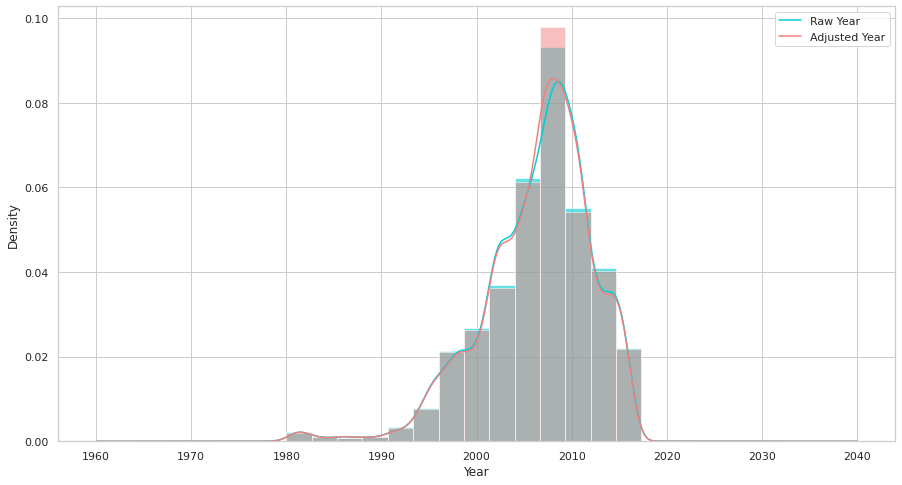

In [ ]:
#compare real data and adjust data of column "Year"
plt.figure(figsize=(15,8))
ax = df["Year"].hist(bins=15, density=True, stacked=True, color='darkturquoise', alpha=0.6)
df["Year"].plot(kind='density', color='darkturquoise')
ax = data["Year"].hist(bins=15, density=True, stacked=True, color='lightcoral', alpha=0.5)
data["Year"].plot(kind='density', color='lightcoral')
ax.legend(['Raw Year', 'Adjusted Year'])
ax.set(xlabel='Year')
plt.show()

In [ ]:
#check adjust data of column "Publisher"
print('Publisher Count:')
print(data['Publisher'].value_counts())

Publisher Count:
Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Glams                              1
Locus                              1
Warp                               1
Elite                              1
UIG Entertainment                  1
Name: Publisher, Length: 579, dtype: int64


# 3. Exploratory Data Analysis

ต่อมา หลังจากที่เราได้ทำการ cleaning data เป็นที่เรียบร้อยแล้ว เราก็เริ่มต้นสำรวจลักษณะของ data โดยเราได้นำ column ทั้งหมด มาเปรียบเทียบกับ column Global_Sales

## 3.1. Exploration of Top Selling Game

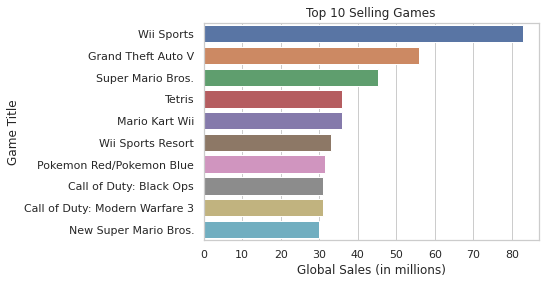

In [ ]:
df_grouped = data.groupby(['Name'], as_index=False).sum()

# Sort the grouped dataset by Global_Sales in descending order
df_sorted = df_grouped.sort_values(['Global_Sales'], ascending=False)

# Get the top 10 selling games
top_10 = df_sorted.head(10)

# Create a barplot of the top 10 selling games
sns.barplot(x='Global_Sales', y='Name', data=top_10)
plt.title('Top 10 Selling Games')
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Game Title')
plt.show()

เริ่มต้นด้วย Top Selling Game

เราได้ทำการ list เกมที่ทำยอดขายได้สูงสุด 10 เกม โดยจากผลลัพธ์ที่ได้ เราได้รับรู้ว่า มีอยู่ 3 เกมที่ทำยอดขายได้สูงโดดออกมาจากเกมที่เหลือค่อนข้างชัดเจน นั่นคือ
  1. Wii Sports
  2. Grand Theft Auto V
  3. Super Mario Bros.

โดยเกม Wii Sports เป็นเกมที่ทำยอดขายได้สูงสุดซึ่งอยู่ที่ 82.74 ซึ่งมากกว่าอันดับ 2 ที่มียอดขายอยู่ที่ 55.92 ถึง 47%

## 3.2. Exploration of Platform

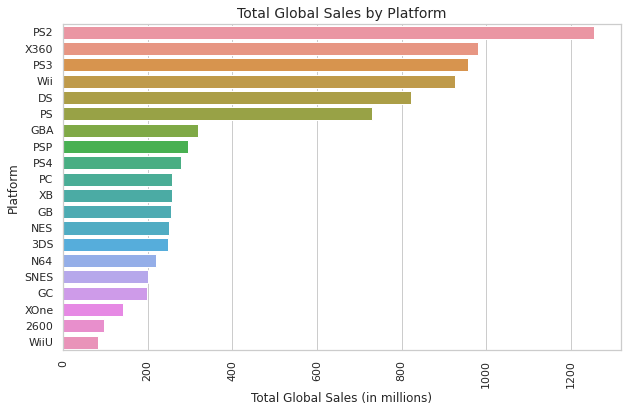

In [ ]:
publisher_sales = data.groupby("Platform").sum()["Global_Sales"].sort_values(ascending=False)[:20]

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.set_palette("deep")
sns.barplot(x=publisher_sales.values, y=publisher_sales.index)
plt.title("Total Global Sales by Platform", fontsize=14)
plt.xlabel("Total Global Sales (in millions)", fontsize=12)
plt.ylabel("Platform", fontsize=12)
plt.xticks(rotation=90)
plt.show()

ถัดไป เป็นการสำรวจ Platform VS Global Sales

เราได้ทำการเปรียบเทียบ column Platform กับ column Global_Sales ด้วย horizontal bar plot โดยเหตุผลที่เราเลือกใช้กราฟนี้ เป็นเพราะเราเชื่อว่าการเปรียบเทียบข้อมูลในแนวนอนสามารถมองเห็นได้ง่ายเมื่อเทียบกับ vertical bar plot

เมื่อเราได้สร้างกราฟออกมาแล้ว เราพบว่ามี platform อยู่ 6 platform ที่ส่งผลต่อ Global Sales อย่างเห็นได้ชัด นั่นคือ
  1. PS2
  2. X360
  3. PS3
  4. Wii
  5. DS
  6. PS

จะเห็นได้ว่า PS หรือเครื่อง playstation นั้น สามารถติด Top 6 ของ Platform ได้มากถึง 3 อันดับ นั่นคือ PS2, PS3 และ PS

ถึงอย่างนั้น ก็มีสิ่งหนึ่งที่น่าสนใจหลังจากที่เราได้ทำการสร้างกราฟนี้ออกมาแล้ว นั่นคือ เมื่อเราลองดูข้อมูลของเครื่อง playstation (PS) ในทุกรุ่น เราพบว่าหลังจาก PS2 เป็นต้นไป แนวโน้มของ PS ในแต่ละรุ่นเทียบกับ global sales กลับลดลงอย่างเห็นได้ชัด

ถ้า PS, PS2, PS3, PS4 คือรุ่นต่าง ๆ ของเครื่อง playstation การที่รุ่นหลัง ๆ มีแนวโน้มของยอดขายทั่วโลกลดลงเรื่อย ๆ นั่นเป็นไปได้หรือไม่ว่า ตลาด video game ของทั่วโลก กำลังเริ่มต้นเข้าสู่ช่วงขาลง?

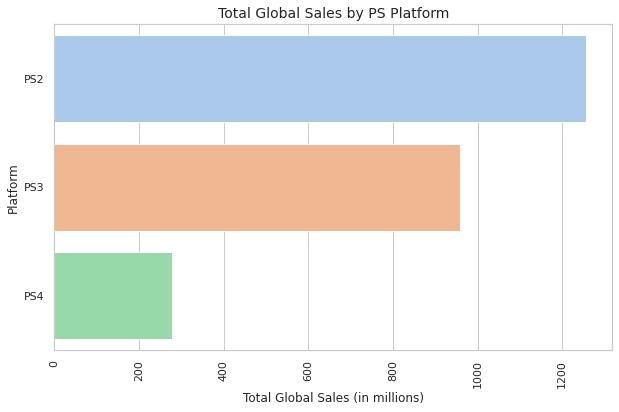

In [ ]:
platforms = ["PS2", "PS3", "PS4"]
publisher_sales = data[data["Platform"].isin(platforms)].groupby("Platform").sum()["Global_Sales"]

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.set_palette("pastel")
sns.barplot(x=publisher_sales.values, y=publisher_sales.index)
plt.title("Total Global Sales by PS Platform", fontsize=14)
plt.xlabel("Total Global Sales (in millions)", fontsize=12)
plt.ylabel("Platform", fontsize=12)
plt.xticks(rotation=90)
plt.show()


## 3.3. Exploration of Year

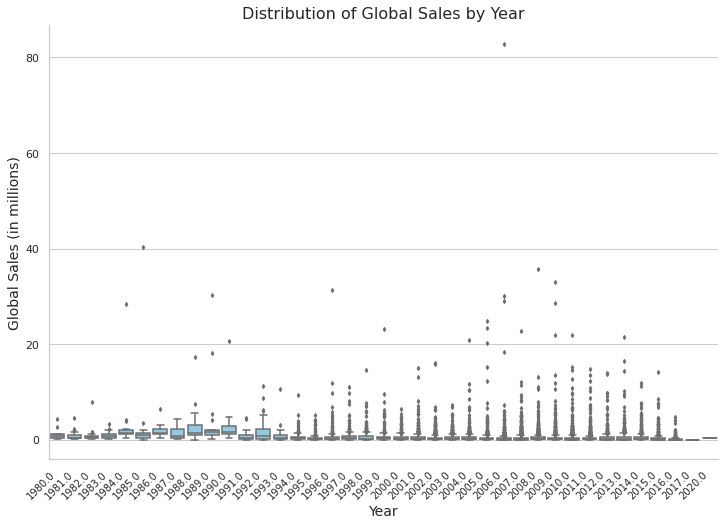

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Year', y='Global_Sales', data=data, color='skyblue', fliersize=3, width=0.8, saturation=0.8)
sns.despine()
plt.xlabel('Year', fontsize=14)
plt.ylabel('Global Sales (in millions)', fontsize=14)
plt.title('Distribution of Global Sales by Year', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.show()

ต่อมา เราก็เริ่มต้นสำรวจ Year VS Global Sales โดยเราเลือกที่จะใช้ boxplot ในการสำรวจ เพราะเชื่อว่า boxplot จะสามารถให้ข้อมูลของแนวโน้มในแต่ละปีได้

ถึงอย่างนั้น เมื่อเราได้ลองใช้งานจริง เรากลับพบว่ากราฟที่ออกมานั้นมองยากจนเกินไป โดยเหตุผลเป็นเพราะ data ชุดนี้มี outlier ที่สูงมาก
ด้วยเหตุนี้ เราจึงจำเป็นที่จะต้องมองหาวิธีแก้ไข

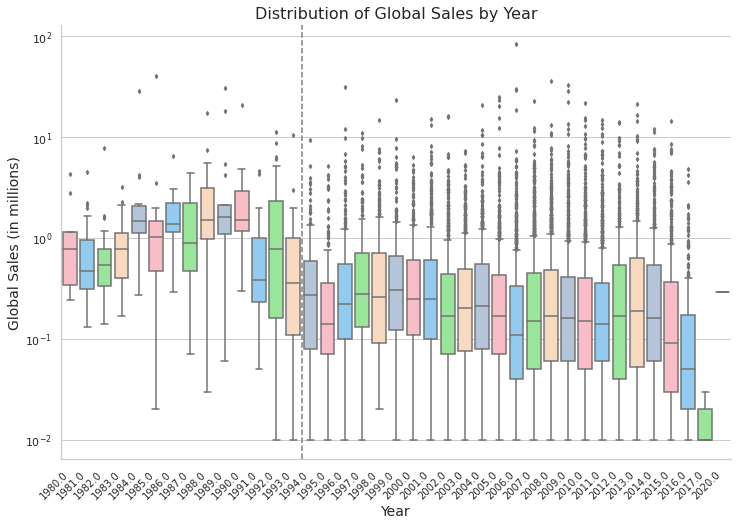

In [ ]:
pastel_colors = ["#FFB6C1", "#87CEFA", "#90EE90", "#FFDAB9", "#B0C4DE"]

plt.figure(figsize=(12, 8))
sns.boxplot(x='Year', y='Global_Sales', data=data, palette=pastel_colors, fliersize=3, width=0.8, saturation=0.8)
sns.despine()
plt.axvline(x=13.5, linestyle='--', color='gray')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Global Sales (in millions)', fontsize=14)
plt.title('Distribution of Global Sales by Year', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yscale('log')

plt.show()

หลังจากที่มองหาวิธีการแก้ไขอยู่พักหนึ่ง เราก็สามารถหาวิธีแก้ไขที่เหมาะสมได้ โดยวิธีที่เราเลือกใช้ก็คือ เราเลือกที่จะปรับสเกลของกราฟเป็นแบบ log เพื่อทำให้สามารถมองเห็นข้อมูลได้ชัดเจนขึ้น

และผลลัพธ์ที่ได้จากกราฟนั้น แสดง insight ที่น่าสนใจอย่างหนึ่งออกมา

โดยถ้าเราแบ่งกราฟออกเป็นฝั่ง "ก่อน" ปี 1994 กับฝั่ง "หลัง" ปี 1994 เราจะพบได้อย่างแรกว่า ค่าเฉลี่ยของกราฟฝั่ง "ก่อน" มีค่าเยอะกว่ากราฟฝั่ง "หลัง" ค่อนข้างชัดเจน ซึ่งเป็นสิ่งที่อาจจะบ่งบอกได้ถึงขาลงของตลาดวิดีโอเกมเช่นเดียวกับหัวข้อก่อนหน้า

ถึงอย่างนั้น กราฟฝั่ง "หลัง" ก็แสดงบางสิ่งที่น่าสนใจออกมาเช่นเดียวกัน นั่นคือ กราฟฝั่ง "หลัง" นั้น มี outlier เยอะกว่าฝั่ง "ก่อน" มากอย่างเห็นได้ชัด

นั่นจึงอาจจะบอกได้ว่า ตั้งแต่ปี 1994 เป็นต้นมา การทำเกมขึ้นมาหนึ่งเกม จะไม่ใช่ว่าเกมอะไรก็ขายได้อีกแล้ว เกมที่จะทำรายได้ได้อย่างมหาศาล จะมีเพียงแค่เกมที่สนุกและควรค่าแก่เวลาของผู้เล่นเท่านั้น

## 3.4. Exploration of Genre

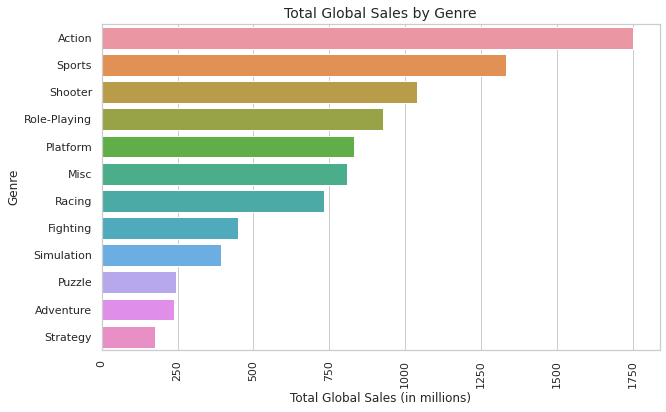

In [ ]:
publisher_sales = data.groupby("Genre").sum()["Global_Sales"].sort_values(ascending=False)[:20]

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.set_palette("deep")
sns.barplot(x=publisher_sales.values, y=publisher_sales.index)
plt.title("Total Global Sales by Genre", fontsize=14)
plt.xlabel("Total Global Sales (in millions)", fontsize=12)
plt.ylabel("Genre", fontsize=12)
plt.xticks(rotation=90)
plt.show()

ต่อไป เป็นการสำรวจ Genre VS Global Sales

ในหัวข้อนี้ เราได้ใช้ horizontal bar plot เช่นเดียวกับหัวข้อ 3.3 เพื่อให้สามารถเปรียบเทียบข้อมูลได้สะดวก โดยผลลัพธ์ที่ได้จากกราฟนั้น ห้าอันดับของ Genre ที่มียอดขายสูงสุด คือ
  1. Action
  2. Sports
  3. Shooter
  4. Role-Playing
  5. Platform

ซึ่งอันดับที่ได้มานี้ มีความน่าสนใจเป็นอย่างมาก เนื่องจากถ้าย้อนกลับไปหัวข้อที่ 3.1 เราจะพบว่าอันดับหนึ่งของ Top Selling Game ที่มียอดขายมากกว่าอันดับสองถึง 47% นั้น คือเกม "Wii Sports" ซึ่งเป็นเกมประเภท "Sports" แถมอันดับ 5 และอันดับ 6 ของหัวข้อที่ 3.1 ก็ยังเป็นเกมประเภท "Sports" เช่นเดียวกัน แต่เมื่อมองมายัง Genre ที่มียอดขายมากที่สุด กลับพบว่าอันดับหนึ่งของหัวข้อนี้ไม่ใช่ เกมประเภท "Sports" แต่เป็นเกมประเภท "Action"

นั่นจึงอาจจะสะท้อนได้ถึงความหลากหลายของจำนวนเกมใน Genre ทั้งสองนี้ โดยเกมประเภท "Action" ถ้าเทียบเฉพาะหัวข้อ Top Selling Game เกมประเภทนี้อาจจะไม่ได้ขึ้นไปถึงอันดับหนึ่ง แต่ก็เป็นไปได้สูงว่าจะมีเกมประเภท "Action" อยู่หลายเกมมาก จึงสามารถขึ้นเป็นอันดับหนึ่งของ Genre ได้ กลับกัน เกมประเภท "Sports" ถึงแม้ว่าเกมที่มียอดขายอันดับหนึ่งจะเป็นเกมประเภทนี้ แต่เกมประเภท "Sports" กลับไม่สามารถขึ้นเป็นอันดับหนึ่งของ Genre ได้ นั่นจึงเป็นไปได้ว่า เกมประเภท "Sports" นั้น มีจำนวนที่น้อยกว่า หรือก็คือที่เกมประเภท "Sports" ขึ้นมาถึงอันดับสองของหัวข้อนี้ได้ อาจจะมาจากเกมหัวหอกจำนวนน้อย แต่ว่าในบรรดาเกมหัวหอกที่ว่านั้น แต่ละเกมได้รับความนิยมจากผู้เล่นสูงมาก

ปล. จากข้อมูลที่ได้รับมานี้ สมมุติว่าวันหนึ่งเราจะสร้างเกมขึ้นมาหนึ่งเกม การเลือกประเภทของเกมที่จะมีโอกาสติดตลาดได้ง่ายนั้น มีแนวโน้มว่าจะเป็นเกมประเภท "Action" เนื่องจากข้อมูลทั้งหมดที่ค้นพบสามารถบ่งบอกได้ว่า ผู้เล่นนั้นชื่นชอบเกมประเภท "Action" มากกว่า และเปิดใจให้กับเกม "Action" ใหม่ ๆ มากกว่าเกมประเภท "Sports"

## 3.5. Exploration of Publisher

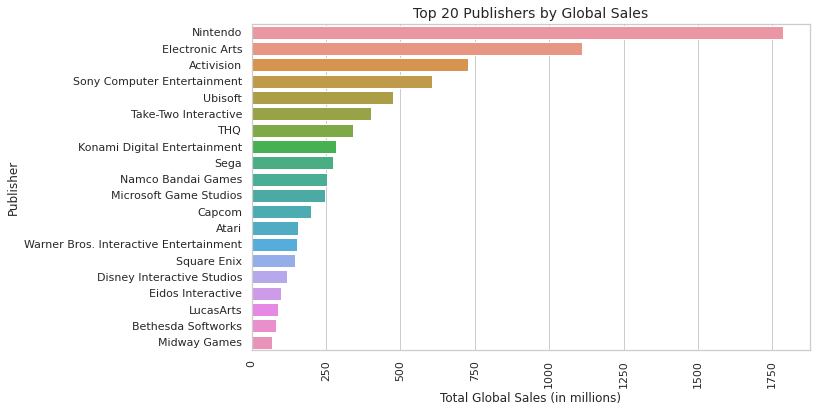

In [ ]:
publisher_sales = data.groupby("Publisher").sum()["Global_Sales"].sort_values(ascending=False)[:20]

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.set_palette("deep")
sns.barplot(x=publisher_sales.values, y=publisher_sales.index)
plt.title("Top 20 Publishers by Global Sales", fontsize=14)
plt.xlabel("Total Global Sales (in millions)", fontsize=12)
plt.ylabel("Publisher", fontsize=12)
plt.xticks(rotation=90)
plt.show()

จากนั้นจะเป็นการสำรวจ Publisher VS Global Sales

ซึ่งหัวข้อนี้ ก็จะใช้ horizontal bar plot เช่นเดียวกับหัวข้อก่อนหน้า แต่ในหัวข้อนี้ เราจะนำเสนอเพียงแค่ 20 อันดับสูงสุด เนื่องจากจำนวน Publisher ของ data นี้มีหลากหลายมาก การนำเสนอ Publisher ทั้งหมดจะทำให้กราฟอ่านยากจนเกินไป โดยผลลัพธ์ที่ได้จากกราฟนั้น 5 อันดับของ Genre ที่มียอดขายสูงสุด คือ
  1. Nintendo
  2. Electronic Arts
  3. Activition
  4. Sony Computer Entertainment
  5. Ubisoft

ซึ่ง Publisher อันดับหนึ่ง หรือก็คือ "Nintendo" นั้น มีอัตราส่วนมากกว่า "Electronic Arts" ที่เป็นอันดับสองกว่า 50%

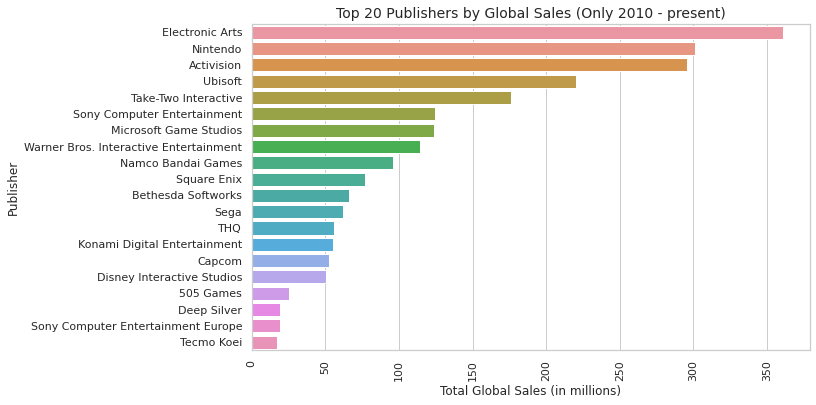

In [ ]:
data2 = data[data['Year'] >= 2010]

publisher_sales = data2.groupby("Publisher").sum()["Global_Sales"].sort_values(ascending=False)[:20]

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.set_palette("deep")
sns.barplot(x=publisher_sales.values, y=publisher_sales.index)
plt.title("Top 20 Publishers by Global Sales (Only 2010 - present)", fontsize=14)
plt.xlabel("Total Global Sales (in millions)", fontsize=12)
plt.ylabel("Publisher", fontsize=12)
plt.xticks(rotation=90)
plt.show()

แล้วปัจจุบันแนวโน้มของข้อมูลนี้มีความเปลี่ยนแปลงไปบ้างหรือไม่?

เป็นคำถามที่เกิดขึ้นในระหว่างที่ทำโปรเจ็คนี้ เราต้องการทราบว่า Nintendo ที่ครองบัลลังก์อันดับหนึ่งเหนือ Publisher อื่นขนาดนี้ ในปัจจุบัน บัลลังก์ที่ว่านั้นมีความสั่นคลอนบ้างรึเปล่า

เพื่อที่จะหาคำตอบของคำถามข้างต้น เราจึงได้ทดลองลดปริมาณของ Data ลงเหลือแค่ข้อมูลตั้งแต่ปี 2010 เป็นต้นมา ซึ่งจากข้อมูลที่ได้นั้น เราได้พบการเปลี่ยนแปลงที่น่าตกใจ นั่นคือ

  1. Nintendo ที่เคยครองอันดับหนึ่งแถมมีปริมาณมากกว่าอันดับสองอย่าง Electronic Arts ถึง 50% นั้น พอเปรียบเทียบเฉพาะข้อมูลช่วง 10 ปีนี้กลับพบว่า Nintendo ไม่ได้มียอดขายสูงกว่าอันดับอื่นอย่างขาดลอยอีกต่อไปแล้ว หนำซ้ำ ยังถูก Electronic Arts ที่เคยเป็นอันดับสอง แย่งตำแหน่งที่ 1 ไปอีก
  2. ในช่วง 10 ปีมานี้ ได้มี Publisher หน้าใหม่เข้ามา 3 Publisher นั่นคือ "505 Games" "Deep Silver" และ "Tecmo Koei" รวมถึงอันดับต่าง ๆ เมื่อเทียบกับกราฟที่มีข้อมูลของทุกปีนั้น ได้สับเปลี่ยนจนแตกต่างไปกว่าเดิมมาก ซึ่งสิ่งนี้สามารถสะท้อนได้ถึงการแข่งขันของอุตสาหกรรมวิดีโอเกมที่มีความดุเดือดอย่างมาก

## 3.6. Exploration of Region Sales



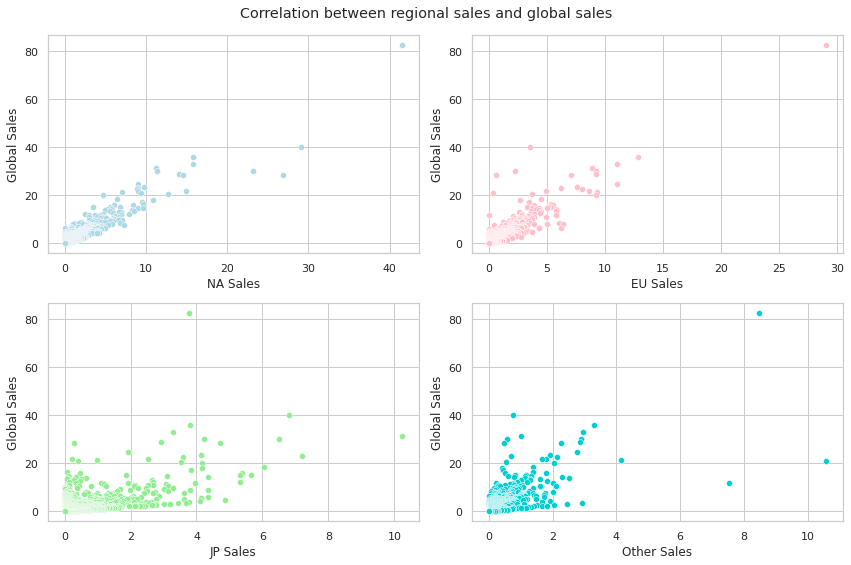

In [ ]:
# create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))

# plot NA sales vs Global sales
sns.scatterplot(data=data, x="NA_Sales", y="Global_Sales", ax=axes[0, 0], color="lightblue")
axes[0, 0].set_xlabel("NA Sales")
axes[0, 0].set_ylabel("Global Sales")

# plot EU sales vs Global sales
sns.scatterplot(data=data, x="EU_Sales", y="Global_Sales", ax=axes[0, 1], color="pink")
axes[0, 1].set_xlabel("EU Sales")
axes[0, 1].set_ylabel("Global Sales")

# plot JP sales vs Global sales
sns.scatterplot(data=data, x="JP_Sales", y="Global_Sales", ax=axes[1, 0], color="lightgreen")
axes[1, 0].set_xlabel("JP Sales")
axes[1, 0].set_ylabel("Global Sales")

# plot Other sales vs Global sales
sns.scatterplot(data=data, x="Other_Sales", y="Global_Sales", ax=axes[1, 1], color="darkturquoise")
axes[1, 1].set_xlabel("Other Sales")
axes[1, 1].set_ylabel("Global Sales")

# adjust the layout and add title
fig.suptitle("Correlation between regional sales and global sales")
plt.tight_layout()

สุดท้ายในหมวดหมู่ Exploratory จะเป็นการสำรวจ Region Sales VS Global Sales

โดยเราได้เลือกใช้ scatterplot ในการสำรวจเพื่อที่จะมาหาความสัมพันธ์ระหว่าง Global Sales และ Sales ในแต่ละภูมิภาค

ซึ่งเมื่อเราได้ผลลัพธ์ออกมาแล้ว เราพบว่า NA_Sales มีความสัมพันธ์ไปในทิศทางเดียวกับ Global_Sales มากที่สุด รองมาด้วย EU_Sales และ Other_Sales และมี JP_Sales ที่มีความสัมพันธ์กับ Global_Sales น้อยที่สุด

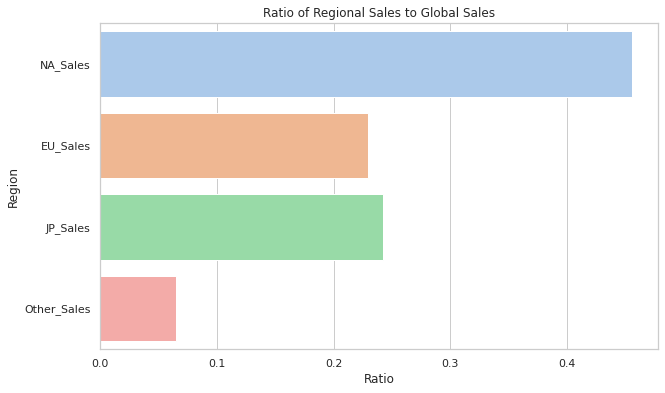

In [ ]:
# Calculate the ratio of regional sales to global sales
df_ratio = pd.DataFrame()
df_ratio['NA_Sales'] = data['NA_Sales'] / data['Global_Sales']
df_ratio['EU_Sales'] = data['EU_Sales'] / data['Global_Sales']
df_ratio['JP_Sales'] = data['JP_Sales'] / data['Global_Sales']
df_ratio['Other_Sales'] = data['Other_Sales'] / data['Global_Sales']

# Create a horizontal bar plot to visualize the regional sales to global sales ratio
sns.set(style="whitegrid", palette="pastel")
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x=df_ratio.mean(), y=df_ratio.columns, ax=ax, orient='h')
plt.title('Ratio of Regional Sales to Global Sales')
plt.xlabel('Ratio')
plt.ylabel('Region')
plt.show()

นอกจากนี้ เราได้วิเคราะห์ข้อมูลเพิ่มเติมด้วย horizontal bar plot เราพบว่าอันดับของยอดขายในแต่ละภูมิภาคเป็นดังนี้
  1. NA_Sales
  2. JP_Sales
  3. EU_Sales
  4. Other_Sales

โดย NA_Sales มีอัตราส่วนยอดขายสูงที่สุด ซึ่งมีอัตราส่วนเกือบ 50% หรือก็คือ ลูกค้าทั้งหมดในโลกนี้ อยู่ที่อเมริกาเหนือไปแล้วครึ่งหนึ่ง

# 4. Insight



จากการทำ EDA ข้างต้นเราได้เห็นถึงแนวโน้มต่างๆ ที่เกิดขึ้นกับอุตสาหกรรม video game เราจึงได้ทำการวิเคราะห์ข้อมูลเชิงลึกเพิ่มเติม โดยมีหัวข้อต่างๆดังนี้

## 4.1 Global Video Game Sales 

ในส่วนนี้เราจะมาเจาะลึกกันที่การเปรียบเทียบมูลค่ายอดขายในแต่ละปีกัน


---



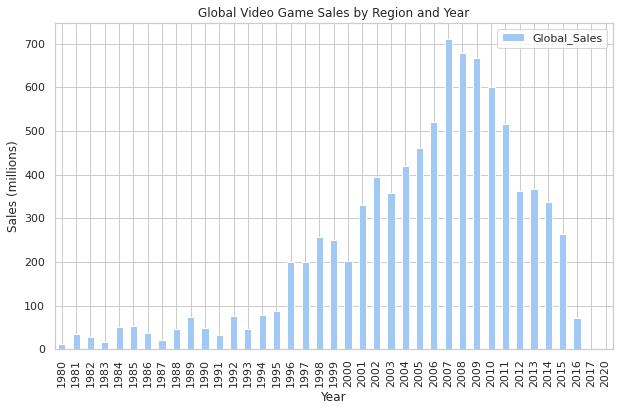

In [ ]:
df['Year'] = pd.to_datetime(data['Year'], format='%Y')

# Group the data by year and sum the sales data for each region
sales_by_year = df.groupby(['Year'])[['Global_Sales']].sum()

# Create the stacked bar chart
ax = sales_by_year.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set the x-axis tick labels to show only the year values
year_labels = [dt.strftime('%Y') for dt in sales_by_year.index]
ax.set_xticklabels(year_labels)

# Set the plot title and axis labels
ax.set_title('Global Video Game Sales by Region and Year')
ax.set_xlabel('Year')
ax.set_ylabel('Sales (millions)')

# Show the plot
plt.show()


จากกราฟพบว่า ในปี 1996 มียอดขายเพิ่มขึ้นจากปี 1995 มากกว่า 1 เท่าตัว และยังคงมีแนวโน้มที่ยอดขายจะเพิ่มขึ้นเรื่อยๆ ในปีต่อมา แสดงให้เห็นถึงแนวโน้มที่ว่าอุตสาหกรรม video game มีการพัฒนาขึ้นอย่างต่อเนื่อง และได้ทำยอดขายถึงจุดสูงสุดในปี 2007 และในปี 2008 เป็นต้นไป ยอดขายมีแนวโน้มลดลงต่อเนื่องอย่างมีนัยสำคัญ ซึ่งนั่นหมายความว่าอุตสาหกรรม video game กำลังถึงคราวซบเซาแล้วหรือไม่?

ข้อมูลจาก https://www.visualcapitalist.com/50-years-gaming-history-revenue-stream/ แสดงให้เห็นถึงความเป็นไปของอุตสาหกรรมเกมในแต่ละยุคสมัย ซึ่งเกม pc และ mobile game เริ่มเข้ามามีบทบาทในอุตสาหกรรมเกมมากขึ้น 
และเมื่อพิจารณาในช่วงหลังปี 2000 มีการพัฒนาของอุตสาหกรรมเกมอย่างแพร่หลายมากขึ้นในหลาย platform ทั้ง computer game , online game และ mobile game ซึ่งเป็น device ที่เข้าถึงได้ง่าย โดยจากข้อมูลพบว่าในปี 2007 พบว่ามีการเปิดตัว iphone ครั้งแรก และในปี 2009 เกม Angry bird ได้กลายมาเป็นเกมที่มียอดดาวน์โหลดสูงสุด นั่นแสดงให้เห็นถึงการพัฒนาอย่างรวดเร็วของ mobile game และสิ่งเหล่านี้อาจส่งผลกระทบที่สำคัญทำให้แนวโน้มยอดขายของ video game ลดลงอย่างต่อเนื่อง 


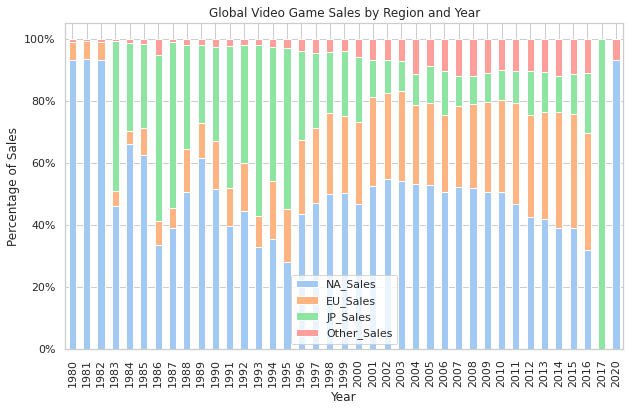

In [ ]:
# Group the data by year and sum the sales data for each region
sales_by_year = df.groupby(['Year'])[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

# Calculate the total sales for each year
total_sales = sales_by_year.sum(axis=1)

# Calculate the percentage of sales for each region
sales_pct = sales_by_year.div(total_sales, axis=0) * 100

# Create the stacked bar chart
ax = sales_pct.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set the x-axis tick labels to show only the year values
year_labels = [dt.strftime('%Y') for dt in sales_pct.index]
ax.set_xticklabels(year_labels)

# Set the y-axis labels to show percentages
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Set the plot title and axis labels
ax.set_title('Global Video Game Sales by Region and Year')
ax.set_xlabel('Year')
ax.set_ylabel('Percentage of Sales')

# Show the plot
plt.show()

มาดูกันต่อที่สัดส่วนของยอดขายในแต่ละภูมิภาค พบว่ายอดขายของภูมิภาคอื่นๆ ค่อนข้างคงที่ และเห็นได้ชัดว่าอเมริกาเหนือเป็นตลาดขายเกมที่ใหญ่ที่สุดมาโดยตลอด อย่างไรก็ตามแม้ยอดขายของอเมริกาเหนือจะค่อนข้างคงที่ แต่ยอดขายของญี่ปุ่นกลับลดลงเรื่อยๆ  และที่น่าสนใจมากคือในช่วงหลายปีที่ผ่านมายอดขายของยุโรปมีการเพิ่มขึ้นอย่างต่อเนื่อง 
จากแนวโน้มเหล่านี้เราอาจจะคาดหวังการเติบโตอย่างต่อเนื่องในตลาดยุโรปได้ แต่ที่สำคัญคือต้องทราบถึงปัจจัยที่อื่นๆที่มีอิทธิพลต่อยอดขายในแต่ละภูมิภาค เช่น ความนิยมของบางเกม ประเภทของเกมที่ผู้คนให้ความสนใจ และการวางจำหน่ายเกมคอนโซล ทำการหาความสัมพันธ์เพื่อให้คาดการณ์แม่นยำยิ่งขึ้น ซึ่งเราจะทำการวิเคราะห์กันในส่วนต่อไป


## 4.2 Rank of Genre in each region 

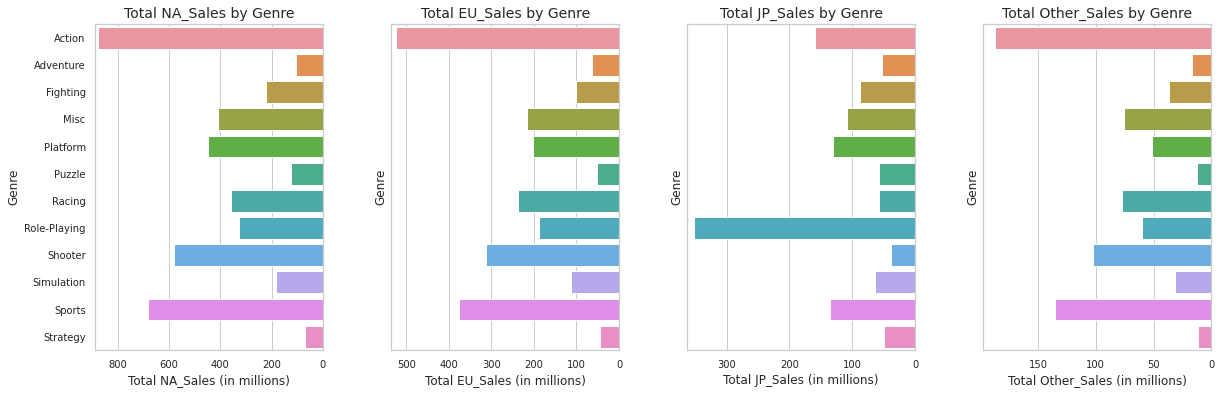

In [ ]:
# Create subplots
fig, axs = plt.subplots(1, 4, figsize=(20, 6), sharey=True)

# Create bar plots for each region
regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
for i, region in enumerate(regions):
    publisher_sales = data.groupby("Genre").sum()[region]
    sns.set_style("whitegrid")
    sns.set_palette("deep")
    sns.barplot(x=publisher_sales.values, y=publisher_sales.index, ax=axs[i])
    axs[i].set_title(f"Total {region} by Genre", fontsize=14)
    axs[i].set_xlabel(f"Total {region} (in millions)", fontsize=12)
    axs[i].set_ylabel("Genre", fontsize=12)
    axs[i].tick_params(axis='y', labelsize=10)
    axs[i].tick_params(axis='x', labelsize=10)
    axs[i].set_xlim([0, max(publisher_sales.values)+10])
    axs[i].invert_xaxis()

plt.subplots_adjust(wspace=0.3)
plt.show()

เราได้ทำการจัด rank ของ genre ของแต่ละภูมิภาคจากยอดขาย จากภาพแสดงให้เห็นว่า
ในอเมริกาเหนือและยุโรปและภูมิภาคอื่นๆ ประเภทของเกมที่ทำยอดขายได้สูงสุด 3 อันดับแรกคือ
1. Action
2. Sports
3. Shooter

---


ในญี่ปุ่นประเภทของเกมที่ทำยอดขายได้สูงสุด 3 อันดับแรกคือ
1. Role-Playing
2. Action
3. Sports

เมื่อพิจารณาการจัดอันดับในแต่ละภูมิภาค เราจะเห็นว่าเกมแนว Action ทำยอดขายได้ดีในทุกภูมิภาค และที่น่าสนใจคือเกมแนว Role-playing ทำยอดขายได้ดีที่สุดในตลาดญี่ปุ่น และมากกว่าอเมริกาเหนือ ยุโรป และภูมิภาคอื่นๆอย่างชัดเจน

จากการวิเคราะห์ทำให้เราสามารถคาดการณ์ได้ว่าเกม Action, Sports และ Shooter จะยังคงได้รับความนิยมต่อไปในอเมริกาเหนือ ยุโรปและภูมิภาคอื่น ในขณะที่เกมแนว Role-playing จะได้รับความนิยมในญี่ปุ่นต่อไป

### North America

เราเกิดความสงสัยเกี่ยวกับข้อสรุปที่เกิดขึ้น เพราะหากมองจากภาพรวมตั้งแต่อดีต ข้อสรุปนี้อาจจะเป็นไปได้ แต่เนื่องจากความก้าวหน้าทางเทคโนโลยีที่ทำให้ platform อื่นๆ มีการพัฒนาเกมมากขึ้น และผลสรุปจากส่วน 4.1 ที่ทำให้เห็นแนวโน้มขาลงของอุตสาหกรรม video game ตั้งแต่ปี 2007 เป็นต้นมา
เราจึงได้แบ่งการวิเคราะห์ Rank of Genre ในแต่ละภูมิภาค ออกเป็น 2 ช่วงเวลา ได้แก่ 
1.   ตั้งแต่ที่อุตสาหกรรม video game เริ่มมีแนวโน้มยอดขายเติบโตขึ้น (ช่วงปี 1996-2006) 
2.   ช่วงขาลงของยอดขาย (ช่วงปี 2007-2017)





<ipython-input-61-f1c41af83065>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Time Period'] = pd.cut(data2['Year'].dt.year, bins=[1998, 2006, 2017], labels=['1996-2006', '2007-2017'])


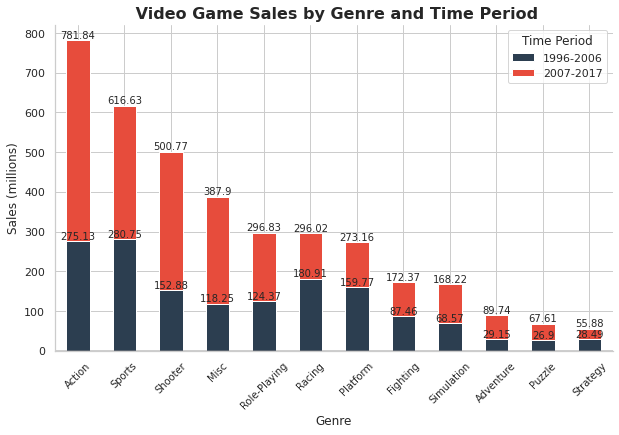

In [ ]:
data['Year'] = pd.to_datetime(data['Year'], format='%Y')

# Filter the data to include only years 1998-2017
data2 = data[(data['Year'] >= '1996-01-01') & (data['Year'] <= '2017-12-31')]

# Create a column to indicate the time period
data2['Time Period'] = pd.cut(data2['Year'].dt.year, bins=[1998, 2006, 2017], labels=['1996-2006', '2007-2017'])

# Calculate the total sales by genre and time period
genre_sales = data2.groupby(['Genre', 'Time Period'])['NA_Sales'].sum().unstack()
genre_sales = genre_sales.loc[genre_sales.sum(axis=1).sort_values(ascending=False).index]

# Set the figure size and create the subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Define the colors for each time period
colors = ['#2c3e50', '#e74c3c']

# Create the stacked bar chart
genre_sales.plot(kind='bar', stacked=True, ax=ax, color=colors)

# Set the plot title and axis labels
ax.set_title(' Video Game Sales by Genre and Time Period', fontsize=16, fontweight='bold')
ax.set_xlabel('Genre', fontsize=12)
ax.set_ylabel('Sales (millions)', fontsize=12)

# Customize the x-axis tick labels
ax.tick_params(axis='x', labelrotation=0, labelsize=10)

# Set the legend
ax.legend(title='Time Period', loc='upper right')

# Add a horizontal line at y=0
ax.axhline(y=0, color='gray', linewidth=1.5, alpha=.5)

# Add annotations for each bar
for p in ax.containers:
    ax.bar_label(p, label_type='edge', fontsize=10)

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(rotation=45)
# Show the plot
plt.show()

ยอดขายของเกม Genre ต่างๆ ในอเมริกาเหนือ เรียงลำดับจากประเภทที่ทำยอดขายได้สูงที่สุดไปยังน้อยที่สุด 
พิจารณาสัดส่วนของยอดขายระหว่างทั้งช่วงปี 1996-2006 และ 2007-2017 พบว่า

Misc   +128.03%

Shooter +127.55%

Action +84.17%

Role-playing +38.66%

Sport  +19.63%

Platforn -29.02%

Racing -36.37%



*	Misc – เป็นอีกประเภทที่ควรได้รับความสนใจ หากดูจากสัดส่วนจะพบว่าเกมประเภทนี้ได้รับความนิยมสูงขึ้นมากกว่า 128.03% ซึ่งเป็นสัดส่วนที่สูงมาก
*	Shooter - ช่วงปี 1996-2006 ทำยอดขายได้ไม่โดดเด่นแต่พอมาพิจารณาสัดส่วนเทียบกับปี 2007-2017 แล้วพบว่าเป็น genre ที่น่าสนใจมาก เพราะสัดส่วนยอดขายที่เพิ่มขึ้นกว่า 127.55% จนทำได้กลายมาเป็นอันดับที่ 3 ได้ จะพบว่ายอดขายรวมในปี 2007-2017 ของ Shooter มากกว่า Sports ที่เป็นอันดับ 2 ด้วย
*	Action - มียอดขายในช่วงปี 1996-2006 ใกล้เคียงกับ Sports แต่ในช่วง 2007-2017 ทำให้ยอดขายแซงหน้า Sports ที่ตีคู่มาอย่างขาดลอย แสดงให้เห็นว่าในช่วงปี 2007-2017 เกมประเภทนี้ได้รับความนิยมมากขึ้นอย่างเห็นได้ชัด
*	Role-playing - มียอดขายเพิ่มขึ้นถึง 38.66% เมื่อเทียบแล้วพบว่ามากกว่า sport
*	Sports – แม้ในช่วงปี 1996-2006 จะทำยอดขายได้ใกล้เคียงกับ Action แต่ในช่วง 2007-2017 ก็ยังมีสัดส่วนของยอดขายใกล้เคียงกับช่วงแรก อาจแสดงให้เห็นว่าเกมประเทภนี้ยังมีความนิยมใกล้เคียงเดิมไม่ได้รับความนิยมเพิ่มขึ้นสักเท่าไหร่
*	และพบว่าเกมบางประเภท เช่น Racing, Platform มีสัดส่วนยอดขายที่ลดลง ซึ่งอาจชี้ให้เห็นว่าในภูมิภาคอเมริกาเหนือ เริ่มไม่ให้ความสนใจและเทรนความนิยมของ Genre กำลังเปลี่ยนไป


### Europe

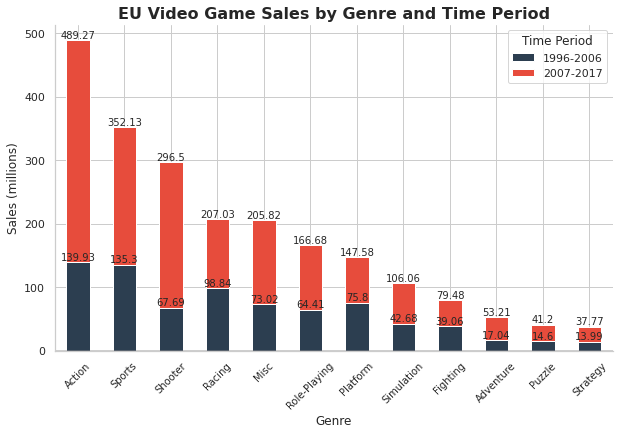

In [ ]:
# Calculate the total sales by genre and time period
genre_sales = data2.groupby(['Genre', 'Time Period'])['EU_Sales'].sum().unstack()
genre_sales = genre_sales.loc[genre_sales.sum(axis=1).sort_values(ascending=False).index]

# Set the figure size and create the subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Define the colors for each time period
colors = ['#2c3e50', '#e74c3c']

# Create the stacked bar chart
genre_sales.plot(kind='bar', stacked=True, ax=ax, color=colors)

# Set the plot title and axis labels
ax.set_title('EU Video Game Sales by Genre and Time Period', fontsize=16, fontweight='bold')
ax.set_xlabel('Genre', fontsize=12)
ax.set_ylabel('Sales (millions)', fontsize=12)

# Customize the x-axis tick labels
ax.tick_params(axis='x', labelrotation=0, labelsize=10)

# Set the legend
ax.legend(title='Time Period', loc='upper right')

# Add a horizontal line at y=0
ax.axhline(y=0, color='gray', linewidth=1.5, alpha=.5)

# Add annotations for each bar
for p in ax.containers:
    ax.bar_label(p, label_type='edge', fontsize=10)

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(rotation=45)
# Show the plot
plt.show()

ยอดขายของเกม Genre ต่างๆ ในยุโรป เรียงลำดับจากประเภทที่ทำยอดขายได้สูงที่สุดไปยังน้อยที่สุด พิจารณาสัดส่วนของยอดขายระหว่างทั้งช่วงปี 1996-2006 และ 2007-2017 พบว่า

Shooter +238.02%

Action +139.93%

Misc   +81.86%

Role-playing +58.37%

Sport  +60.25%

Racing -9.45%

*	Shooter - ด้วยสัดส่วนของยอดขายที่เพิ่มขึ้นถึง 238.02 % ชี้ชัดให้เห็นถึงกระแสความนิยมของ shooter ที่เพิ่มขึ้นอย่างถล่มทลาย
*	Action – ในส่วน action ของตลาดยุโรปมีความคล้ายกับตลาดอเมริกาเหนือ โดยมีสัดส่วนยอดขายเพิ่มสูงขึ้นถึง 139.93 % ทำให้ทิ้งห่างจากอันดับที่ 2 อย่าง Sports อย่างขาดลอย บ่งบอกถึงความนิยมที่เพิ่มขึ้นสูงมาก
*	Misc  -  มีสัดส่วนยอดขายเพิ่มขึ้น 81.86% แสดงให้เห็นถึงกระแสนิยมที่เพิ่มมากขึ้น
*	Sports – สำหรับตลาดยุโรป sport ยังคงได้รับความนิยมอยู่ แต่เมื่อเทียบกับสัดส่วนของ genre อื่นๆ ก็จะเห็นว่า sports ไม่ได้มีสัดส่วนยอดขายเป็นอันดับต้นๆ
*	Race – สัดส่วนยอดขายติดลบเช่นเดียวกับตลาดอเมริกาเหนือ อาจะเป็นสัญญาณว่า Racing เริ่มหมดความนิยมลงเรื่อยๆ




### Japan

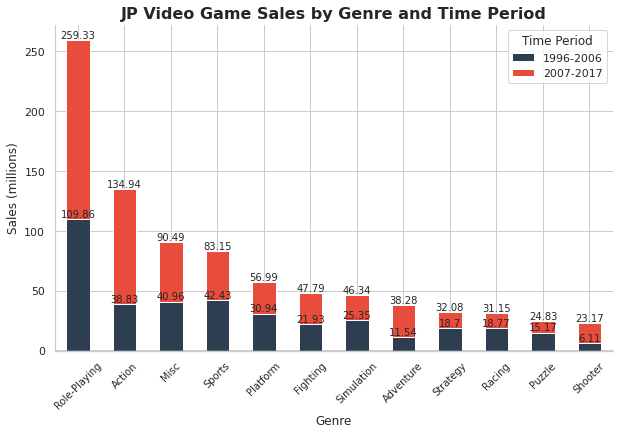

In [ ]:
# Calculate the total sales by genre and time period
genre_sales = data2.groupby(['Genre', 'Time Period'])['JP_Sales'].sum().unstack()
genre_sales = genre_sales.loc[genre_sales.sum(axis=1).sort_values(ascending=False).index]

# Set the figure size and create the subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Define the colors for each time period
colors = ['#2c3e50', '#e74c3c']

# Create the stacked bar chart
genre_sales.plot(kind='bar', stacked=True, ax=ax, color=colors)

# Set the plot title and axis labels
ax.set_title('JP Video Game Sales by Genre and Time Period', fontsize=16, fontweight='bold')
ax.set_xlabel('Genre', fontsize=12)
ax.set_ylabel('Sales (millions)', fontsize=12)

# Customize the x-axis tick labels
ax.tick_params(axis='x', labelrotation=0, labelsize=10)

# Set the legend
ax.legend(title='Time Period', loc='upper right')

# Add a horizontal line at y=0
ax.axhline(y=0, color='gray', linewidth=1.5, alpha=.5)

# Add annotations for each bar
for p in ax.containers:
    ax.bar_label(p, label_type='edge', fontsize=10)

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(rotation=45)
# Show the plot
plt.show()

ยอดขายของเกม Genre ต่างๆ ในญี่ปุ่น เรียงลำดับจากประเภทที่ทำยอดขายได้สูงที่สุดไปยังน้อยที่สุด พิจารณาสัดส่วนของยอดขายระหว่างทั้งช่วงปี 1996-2006 และ 2007-2017 พบว่า

Action +147.51%

Role-playing +36.05% 

Misc   +20.92%

Sport  -4.03%

*	Action – แม้ไม่ได้เป็น genre ที่ทำรายได้สูงสุด แต่ action กลับมีสัดส่วนของยอดขายเพิ่มขึ้นมากที่สุด แสดงให้เห็นว่าคนญี่ปุ่นเริ่มสนใจเกมแนวนี้มากขึ้นอย่างเห้นได้ชัด
*	Role-playing – เป็น genre ที่ทำยอดขายได้สูงสุดมาโดยตลอดสำหรับตลาดญี่ปุ่น แต่กลับมีสัดส่วนยอดขายเป็นอันดับที่ 2 รองลงมาจาก Action
*	Misc  -  มียอดขายในปี 1996-2006 รองลงมาจาก sports แต่กลับมีสัดส่วนยอดขายเพิ่มสูงขึ้นถึง 20.92% อาจแสดงถึงกระแสและแนวโน้มที่กำลังเพิ่มสูงขึ้น
*	Sports – จากสัดส่วนยอดขายที่ติดลบ แสดงให้เห็นถึงกระแสความนิยมที่ซบเซาลงของ sports


### Other



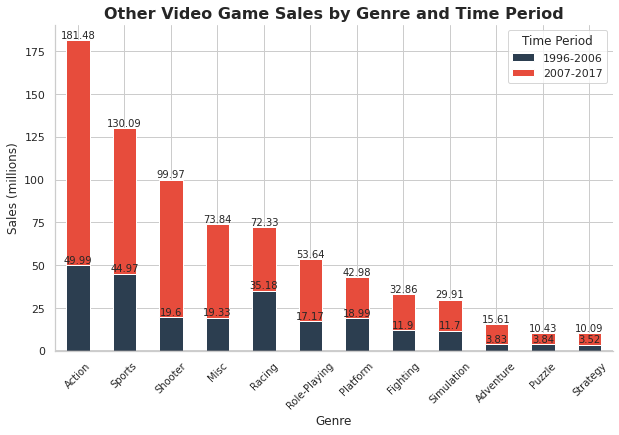

In [ ]:
# Calculate the total sales by genre and time period
genre_sales = data2.groupby(['Genre', 'Time Period'])['Other_Sales'].sum().unstack()
genre_sales = genre_sales.loc[genre_sales.sum(axis=1).sort_values(ascending=False).index]

# Set the figure size and create the subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Define the colors for each time period
colors = ['#2c3e50', '#e74c3c']

# Create the stacked bar chart
genre_sales.plot(kind='bar', stacked=True, ax=ax, color=colors)

# Set the plot title and axis labels
ax.set_title('Other Video Game Sales by Genre and Time Period', fontsize=16, fontweight='bold')
ax.set_xlabel('Genre', fontsize=12)
ax.set_ylabel('Sales (millions)', fontsize=12)

# Customize the x-axis tick labels
ax.tick_params(axis='x', labelrotation=0, labelsize=10)

# Set the legend
ax.legend(title='Time Period', loc='upper right')

# Add a horizontal line at y=0
ax.axhline(y=0, color='gray', linewidth=1.5, alpha=.5)

# Add annotations for each bar
for p in ax.containers:
    ax.bar_label(p, label_type='edge', fontsize=10)

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(rotation=45)
# Show the plot
plt.show()

ยอดขายของเกม Genre ต่างๆ ในภูมิภาคอื่นๆ เรียงลำดับจากประเภทที่ทำยอดขายได้สูงที่สุดไปยังน้อยที่สุด พิจารณาสัดส่วนของยอดขายระหว่างทั้งช่วงปี 1996-2006 และ 2007-2017 พบว่า

Shooter +310.05%

Misc   +181.99%

Action +163.03%

Role-playing +112.40%

Sport  +89.28%

Racing +5.59%

*	Shooter – มีสัดส่วนยอดขายในปี 2007-2017 เมื่อเทียบกับปี 1996-2006 ซึ่งมากถึง 310.05% เป็นค่าที่เยอะมาก แสดงให้เห็นถึงความนิยมที่เพิ่มขึ้นอย่างมาก
*	Misc – มีสัดส่วนยอดขายเพิ่มขึ้นเป็นอันดับที่ 2 จากที่ยอดขายในปี 1996-2006 ทำได้ไม่ดีซักเท่าไหร่ แต่กลับกลายมาเป็นการสร้างรายได้รวมให้ตลาดภูมิภาคอื่นๆ จนกลายเป็นยอดขายรวมอยู่ที่อันดับที่ 4 ได้
*	Action – มีสัดส่วนเพิ่มขึ้นอยู่ที่อันดับที่ 3 มียอดขายเพิ่มขึ้น 163.03% แสดงว่าaction ก็เป็นที่นิยมในภูมิภาคนี้มากขึ้นเช่นกัน
*	Role-playing  -  สร้างสัดส่วนยอดขายอยู่ที่ 112.40 % ซึ่งค่อนข้างมาก ทำให้เห็นถึงกระแสความนิยมของเกมแนวนี้ที่กำลังได้รับความนิยมมากขึ้นแม้จะไม่ได้ทำยอดขายได้เยอะมากก็ตาม
*	Sport – มีการทำยอดขายรวมได้เป้นอันดับที่ 2 แต่มีสัดส่วนยอดขายเพิ่มขึ้นอยู่ที่อันดับที่ 5 แสดงให้เห็นถึงกระแสนิยมที่เริ่มน้อยลง


โดยสรุปแล้วเมื่อเราทำการเปรียบเทียบยอดขายของแต่ละภูมิภาคระหว่างปี 1996-2006 และปี 2007-2017 โดยพิจารณาตาม Genre พบว่าทั้งตลาดในอเมริกาเหนือ ยุโรป และภูมิภาคอื่นๆ มีสัดส่วนการเพิ่มขึ้นของยอดขายใน genre ประเภท Shooter, Action และ Misc สูงที่สุดเป็นสามอันดับแรก ซึ่งจากการ EDA ในขั้นต้น ชัดเจนว่า Action เป็นแนวเกมที่ทำยอดขายได้สูงสุดมาโดยตลอด แต่เมื่อดูในรายละเอียดแล้วจะพบสิ่งที่น่าสนใจคือการที่เกมแนว Shooter และ Misc ที่เริ่มเข้ามาตีตลาด แบ่งส่วนแบ่งยอดขายในสัดส่วนที่มากอย่างน่าเชื่อ ถือเป็นม้ามืดที่ไม่ควรมองข้ามเลยทีเดียว

จากการวิเคราะห์เหล่านี้ทำให้เห็นถึงการเปลี่ยนแปลงของอุตสาหกรรม video game การเปลี่ยนผ่านด้านกระแสนิยม จะเห็นได้ว่าเกมแนว Action เริ่มเข้ามาตีตลาดได้มากขึ้นในช่วงแรกๆ ถึงแม้จะมีเกมประเภทอื่นเช่น Shooter และ Misc เข้ามาแบ่งสัดส่วนยอดขาย แต่ก็ยังคงมีการเติบโตอย่างต่อเนื่อง อาจสะท้อนให้เห็นได้ถึงความหลากหลายของผู้บริโภคที่เมื่อเวลาผ่านไปก็มีความหลากหลายมากขึ้น 
